In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing



In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv("CoffeeRatings.csv", delimiter= ";")

df

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [68]:
df["Color"].unique()

array(['Green', 'Blue-Green', 'Bluish-Green'], dtype=object)

In [69]:
colors = {
    'Green': 'forestgreen',
    'Blue-Green': 'aqua',
    'Bluish-Green': 'teal',
}

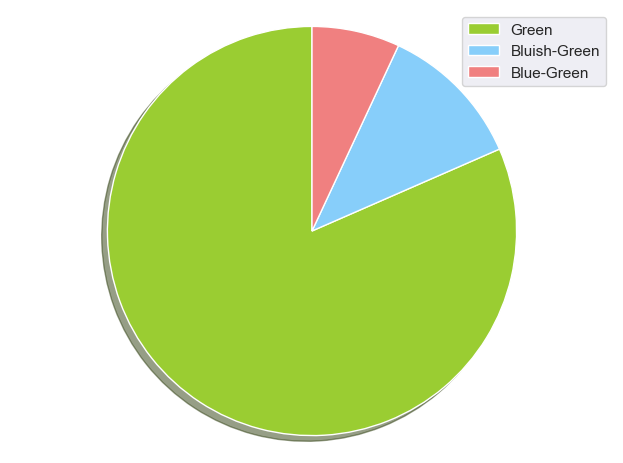

In [70]:
# Ploteo distribución de "Output"
temp = df["Color"].value_counts()
df_aux = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df_aux['labels']
sizes = df_aux['values']
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']#,'cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Podemos notar un profundo desbalanceo en la cantidad de datos de cada clase, lo cual puede afectar el desempeño de los modelos de clasificación. Para solucionar esto, se puede utilizar la técnica de oversampling, la cual consiste en replicar los datos de las clases minoritarias para que tengan la misma cantidad de datos que las clases mayoritarias.

In [92]:
def global_boxplots(df):
    # Asegúrate de que todas las columnas sean numéricas
    columnas_numericas = df.drop('Color',axis=1).select_dtypes(include=['number'])
    
    if columnas_numericas.empty:
        print("No hay columnas numéricas en el DataFrame.")
        return
    
    # Normalizar las columnas numéricas
    scaler = StandardScaler()
    columnas_numericas_normalized = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)
    
    # Crear una lista de títulos de columnas rotados
    column_titles = [col for col in columnas_numericas_normalized.columns]
    # column_titles = [col for col in columnas_numericas.columns]

    # Graficar los boxplots de las columnas numéricas normalizadas con rango en el eje Y de -4 a 4
    plt.figure(figsize=(20, 10))
    plt.title("Boxplots para todas las variables")
    boxplot = plt.boxplot(columnas_numericas_normalized.values, vert=True)
    # boxplot = plt.boxplot(columnas_numericas.values, vert=True)

    # Rotar los títulos de las columnas
    plt.xticks(range(1, len(columnas_numericas_normalized.columns) + 1), column_titles, rotation=90)
    # plt.xticks(range(1, len(columnas_numericas.columns) + 1), column_titles, rotation=90)

    plt.xlabel("Variables")
    plt.ylabel("Valores Normalizados")
    # plt.ylim(-4, 4)  # Establecer el rango en el eje Y
    plt.show()

def global_violinplots(df):
    # Asegúrate de que todas las columnas sean numéricas
    columnas_numericas = df.drop('Color', axis=1).select_dtypes(include=['number'])

    if columnas_numericas.empty:
        print("No hay columnas numéricas en el DataFrame.")
        return

    # Normalizar las columnas numéricas
    scaler = StandardScaler()
    columnas_numericas_normalized = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)

    # Crear una lista de títulos de columnas rotados
    column_titles = [col for col in columnas_numericas_normalized.columns]

    # Configurar el estilo de Seaborn para mejorar la estética
    sns.set(style="whitegrid")

    # Graficar los violines de las columnas numéricas normalizadas
    plt.figure(figsize=(20, 10))
    plt.title("Violinplots para todas las variables")
    violinplot = sns.violinplot(data=columnas_numericas_normalized, inner="quartile")
    
    # Rotar los títulos de las columnas
    violinplot.set_xticklabels(column_titles, rotation=90)
    
    plt.xlabel("Variables")
    plt.ylabel("Valores Normalizados")
    plt.show()

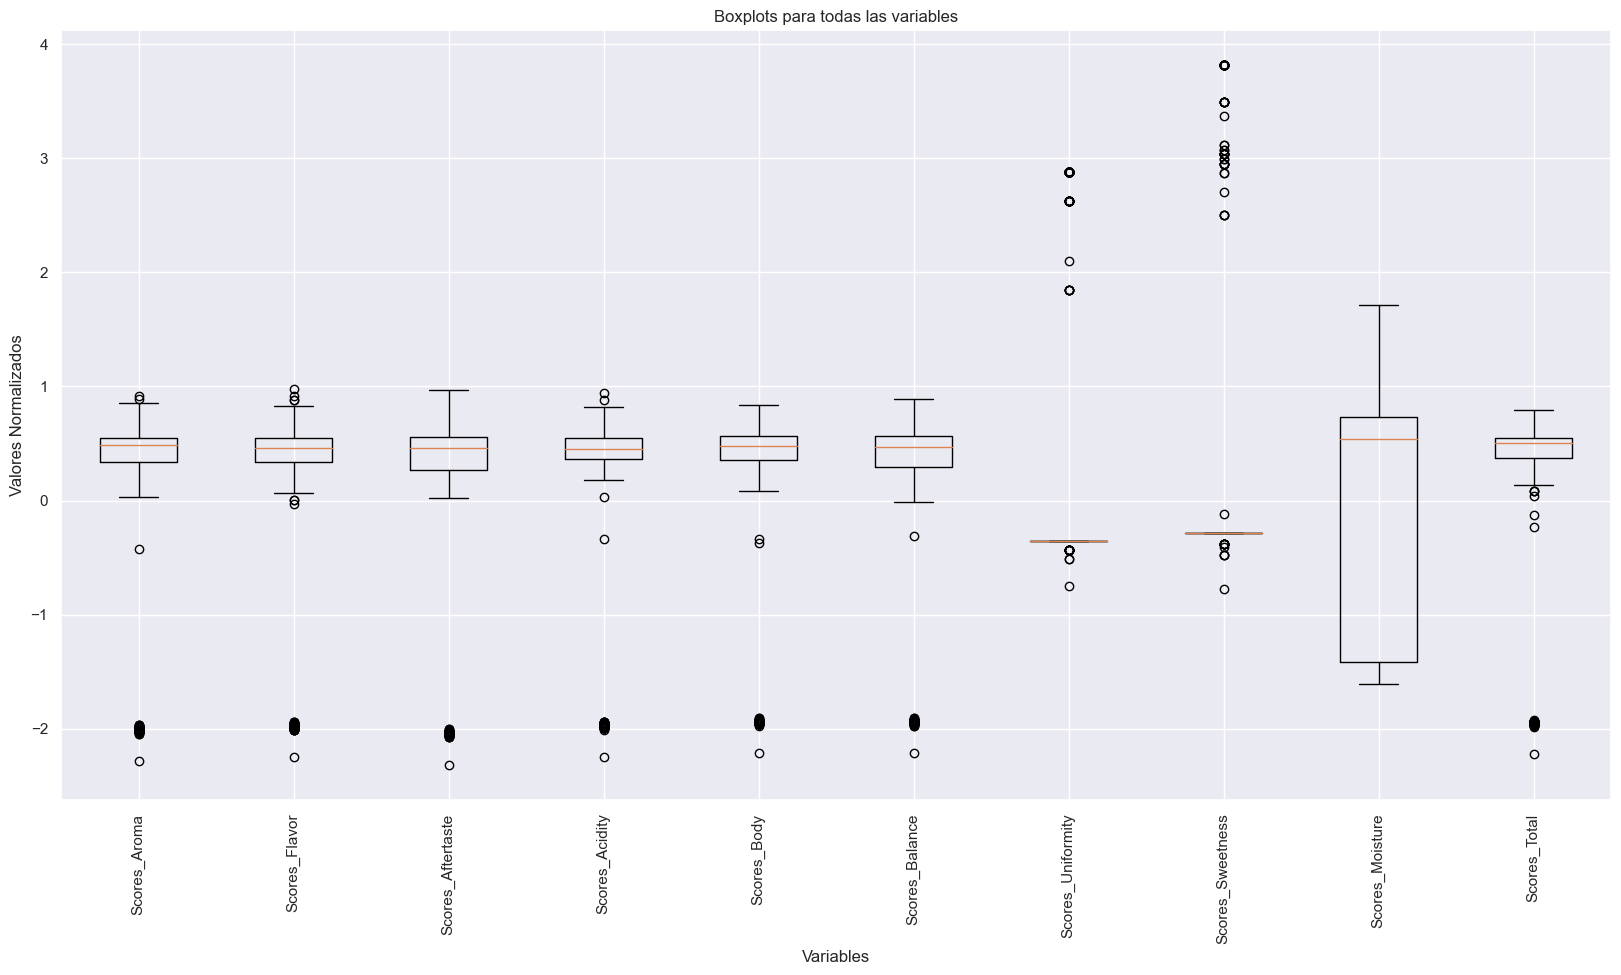

In [72]:
global_boxplots(df)

A simple vista los boxplot parecerían indicar que hay una gran cantidad de datos que ppodrían considerarse outliers, podríamos tratar de eliminar estos valores sin embargo caeríamos en un error muy importante dado que dichos datos no son outliers sino que las variables presentan distribuciones gaussianas bimodales. Esto lo podemos visualizar mejor en los gráficos de violines a continuación.

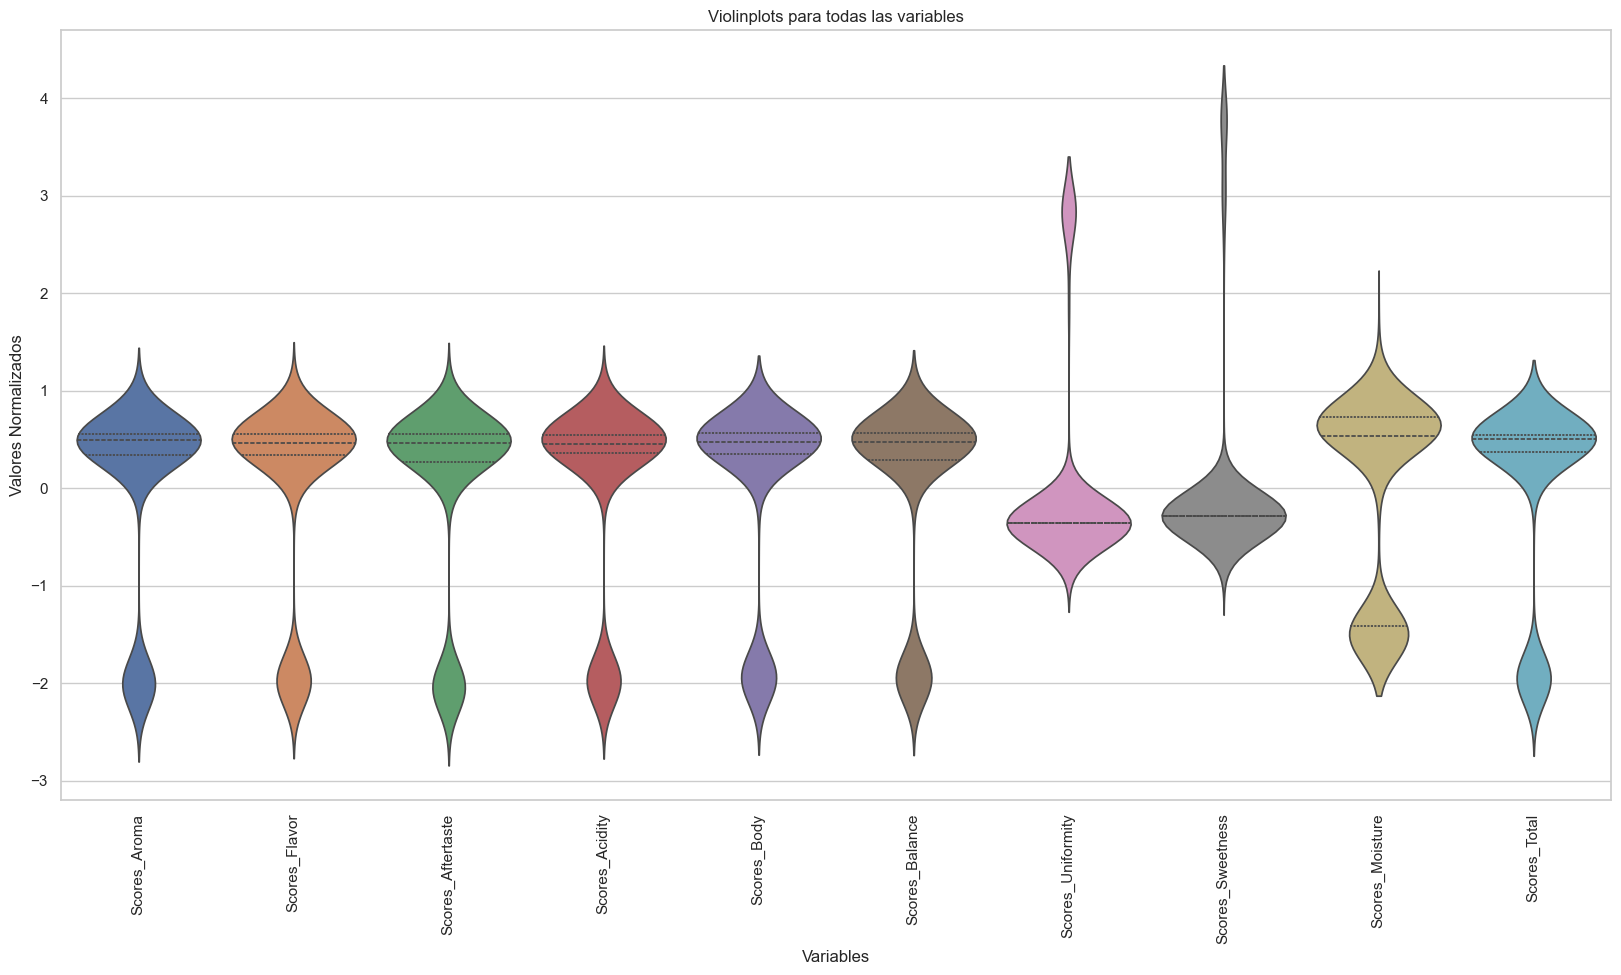

In [74]:
global_violinplots(df)

In [75]:
def violinplots(df, x, y):
    plt.figure(figsize=(15,10))
    sns.violinplot(x=x, y=y, data=df, palette=colors, inner="quartile")
    # plt.xticks(rotation=90)
    plt.show()

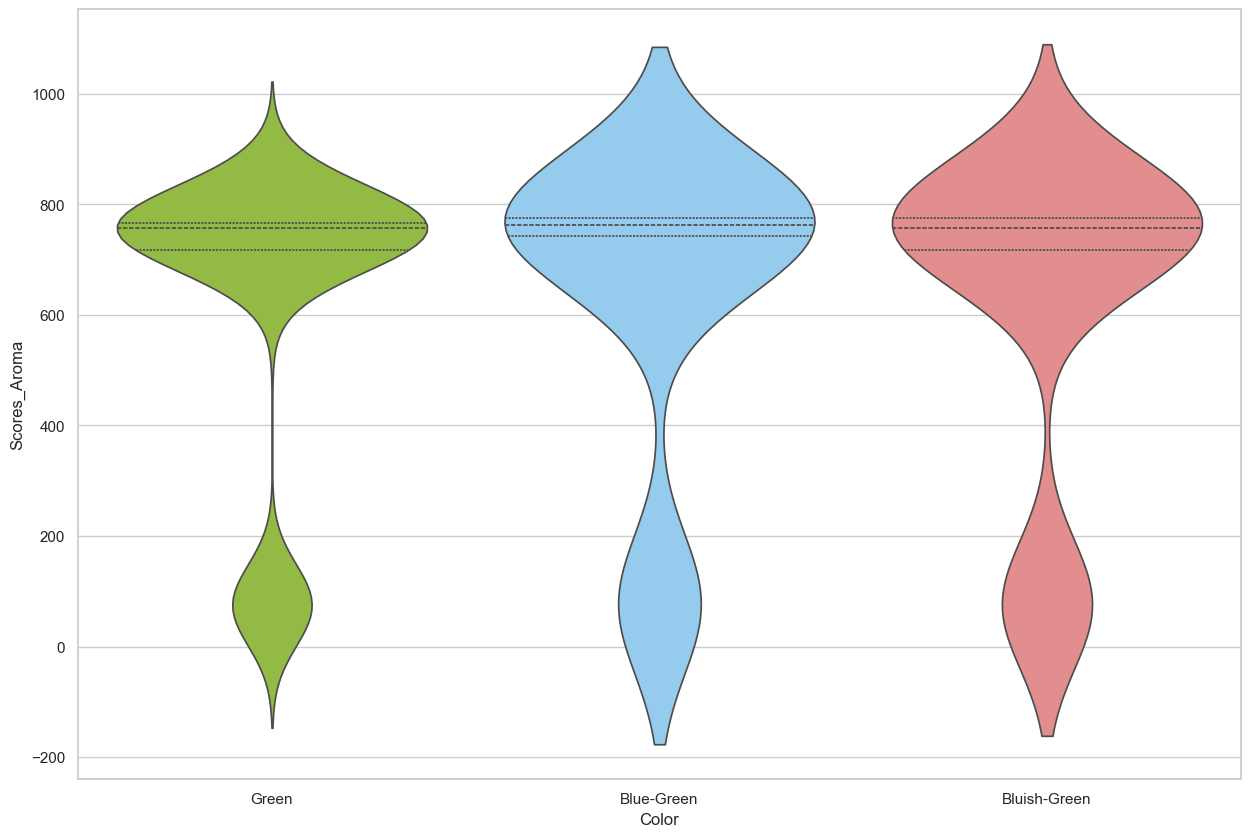

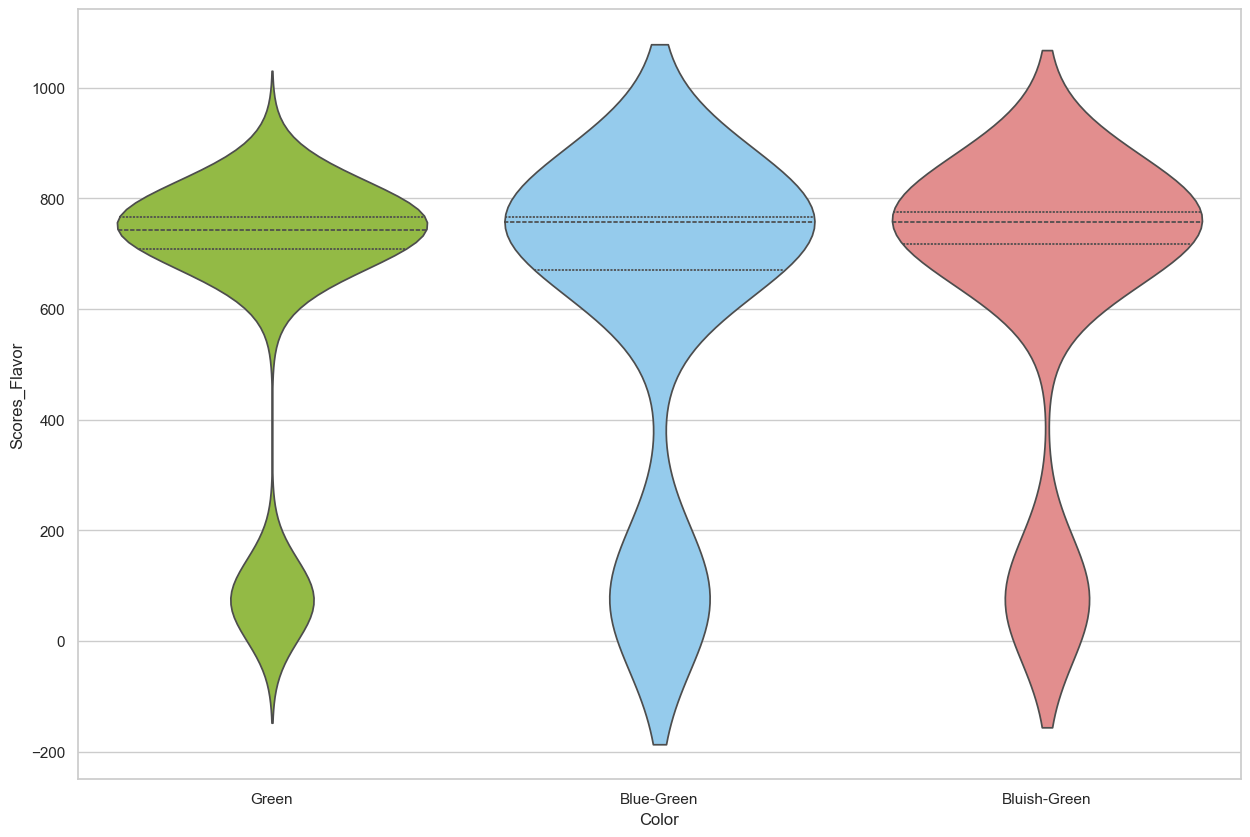

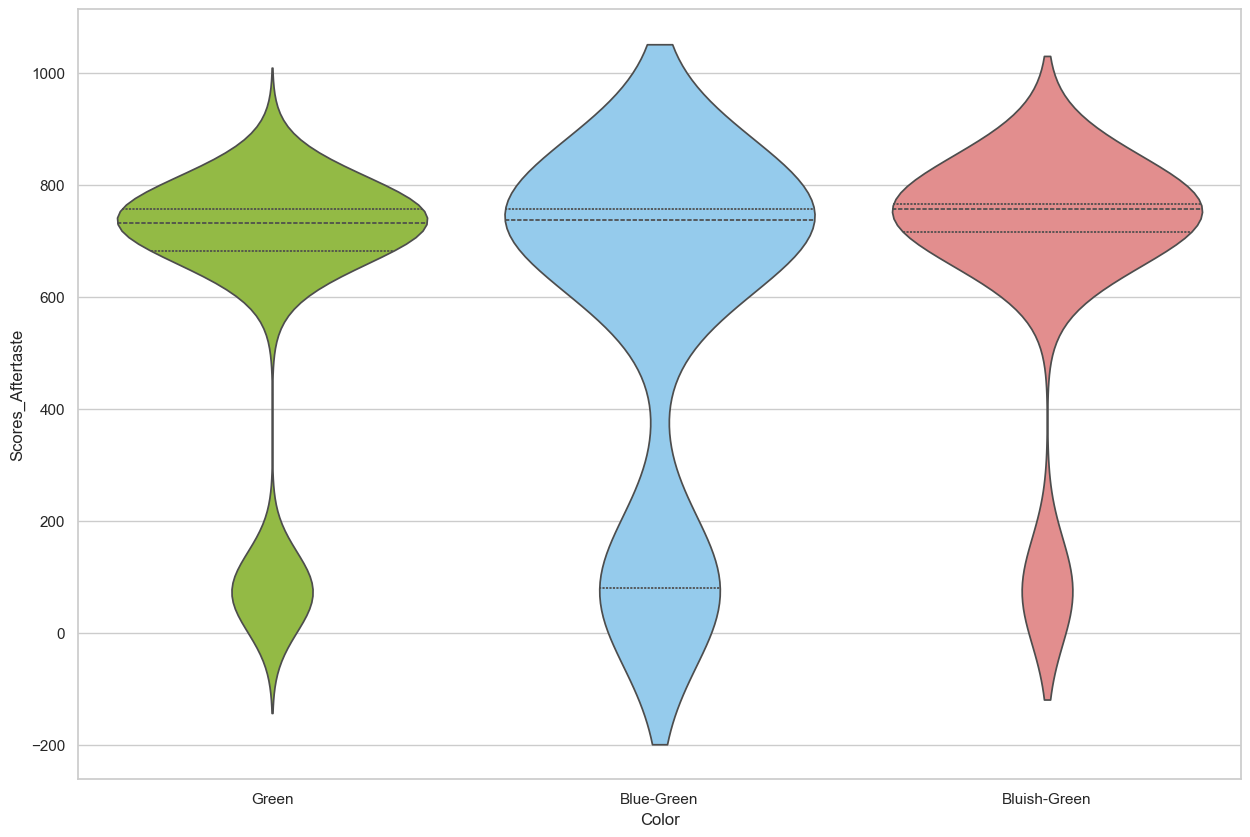

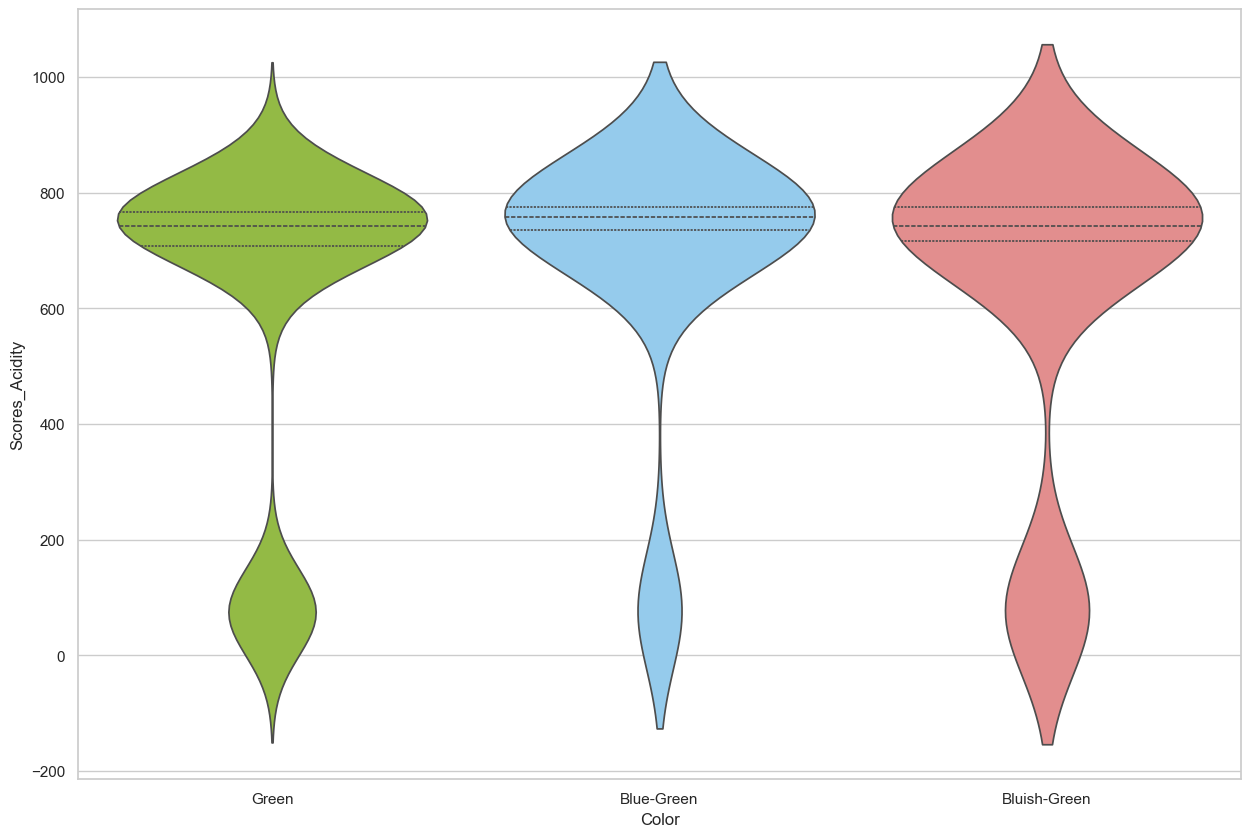

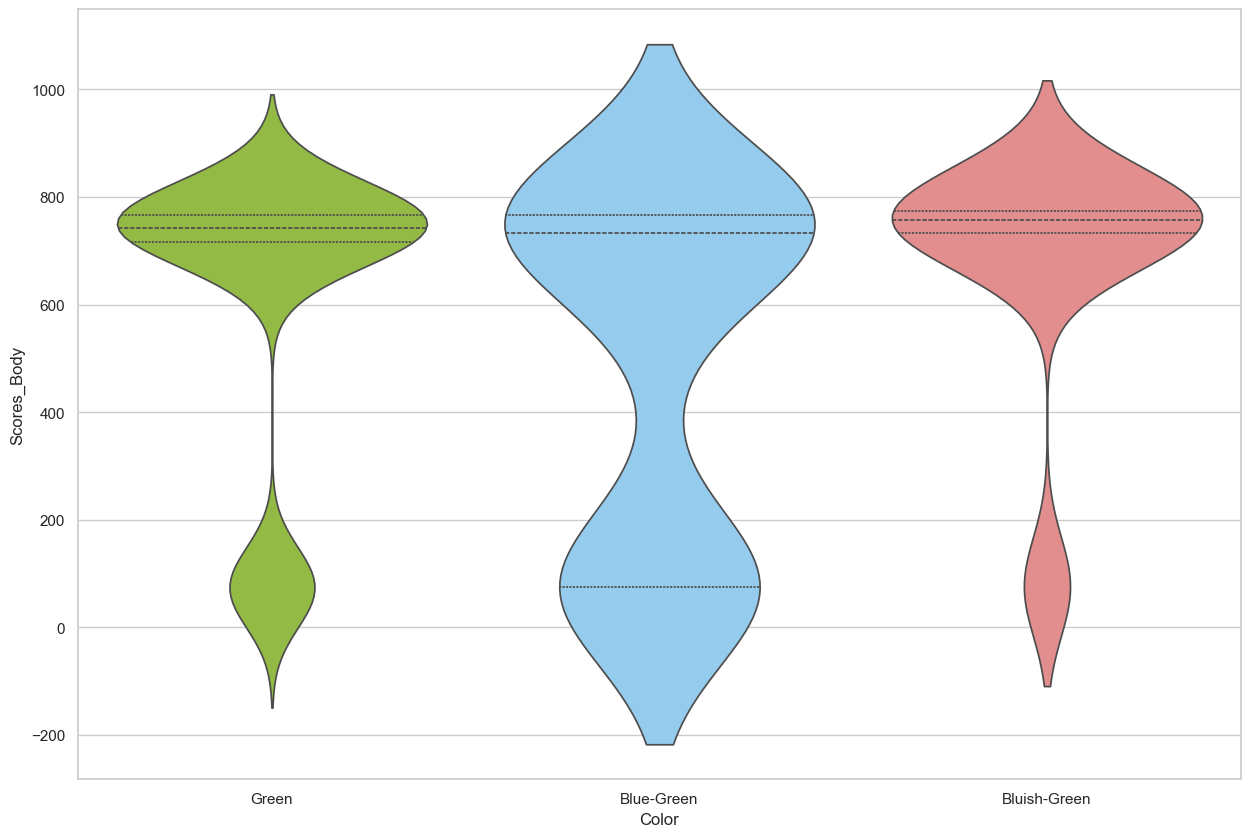

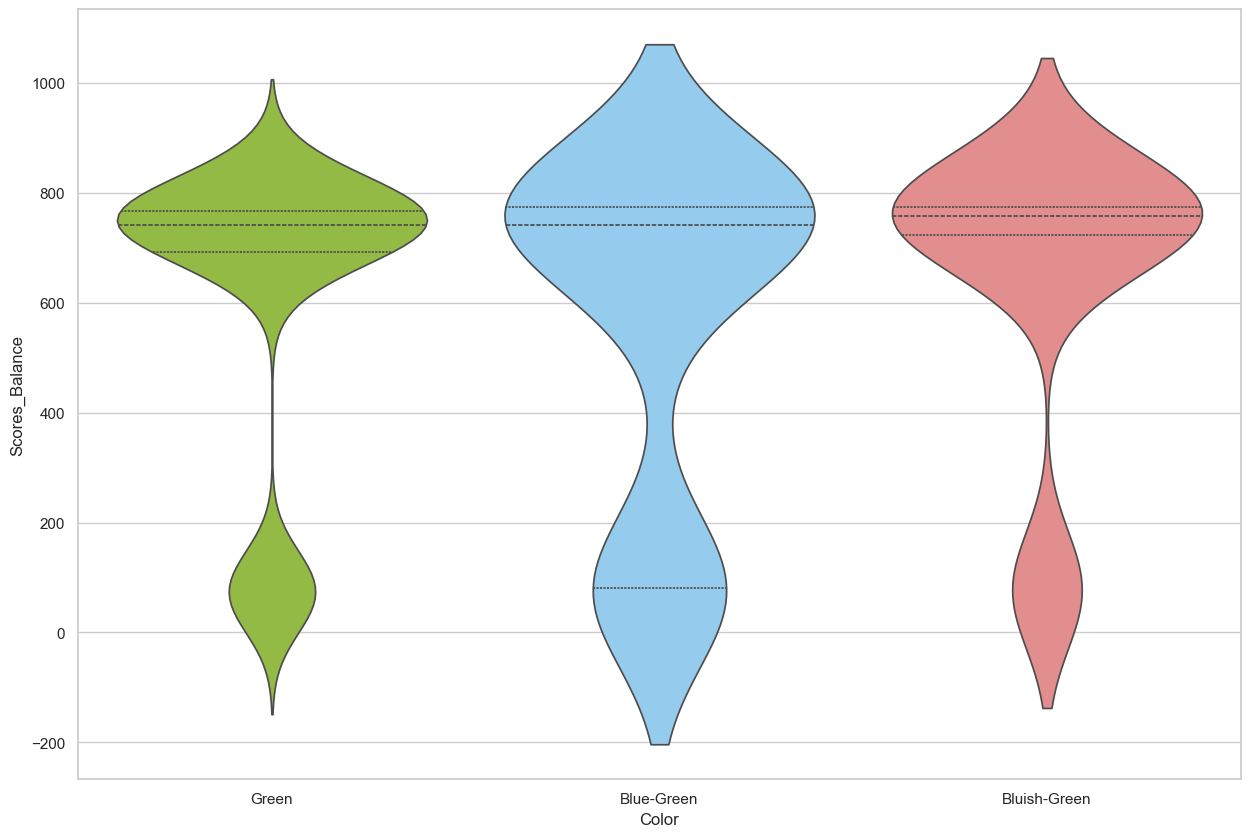

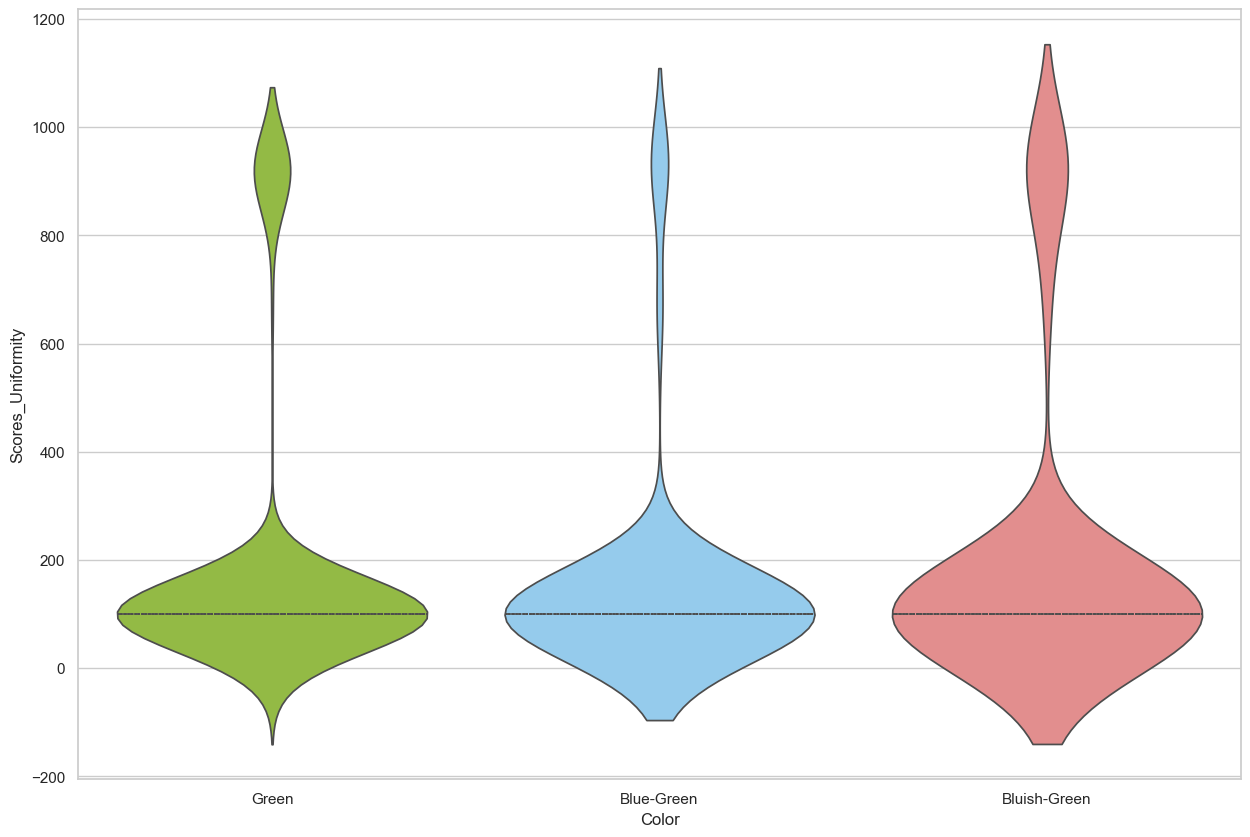

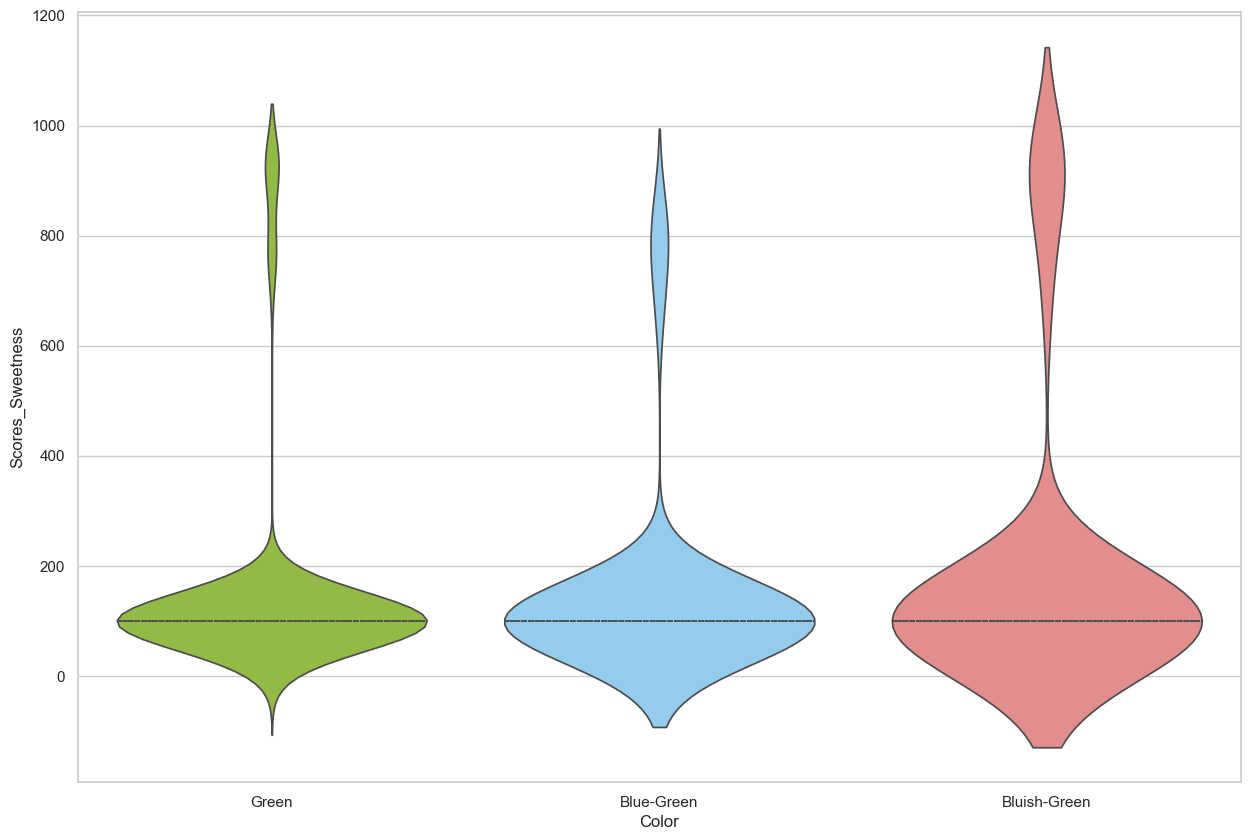

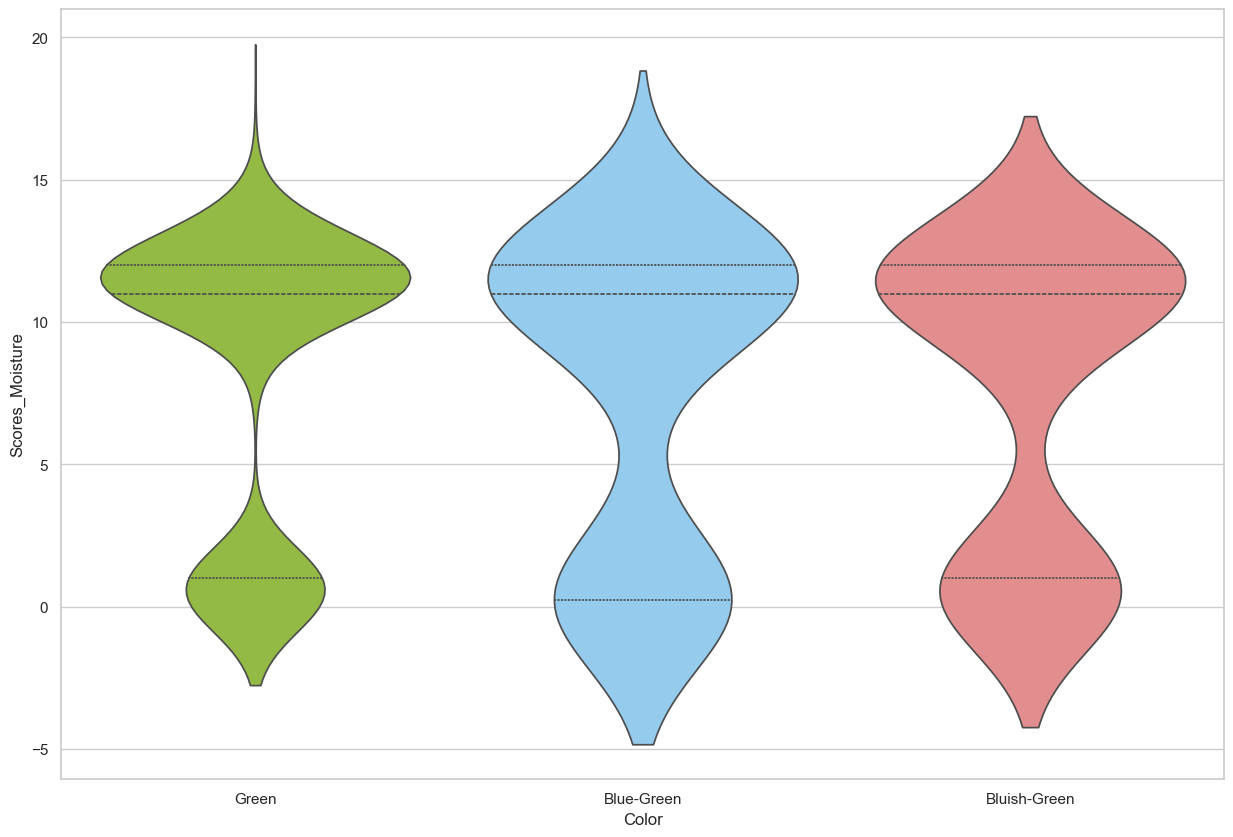

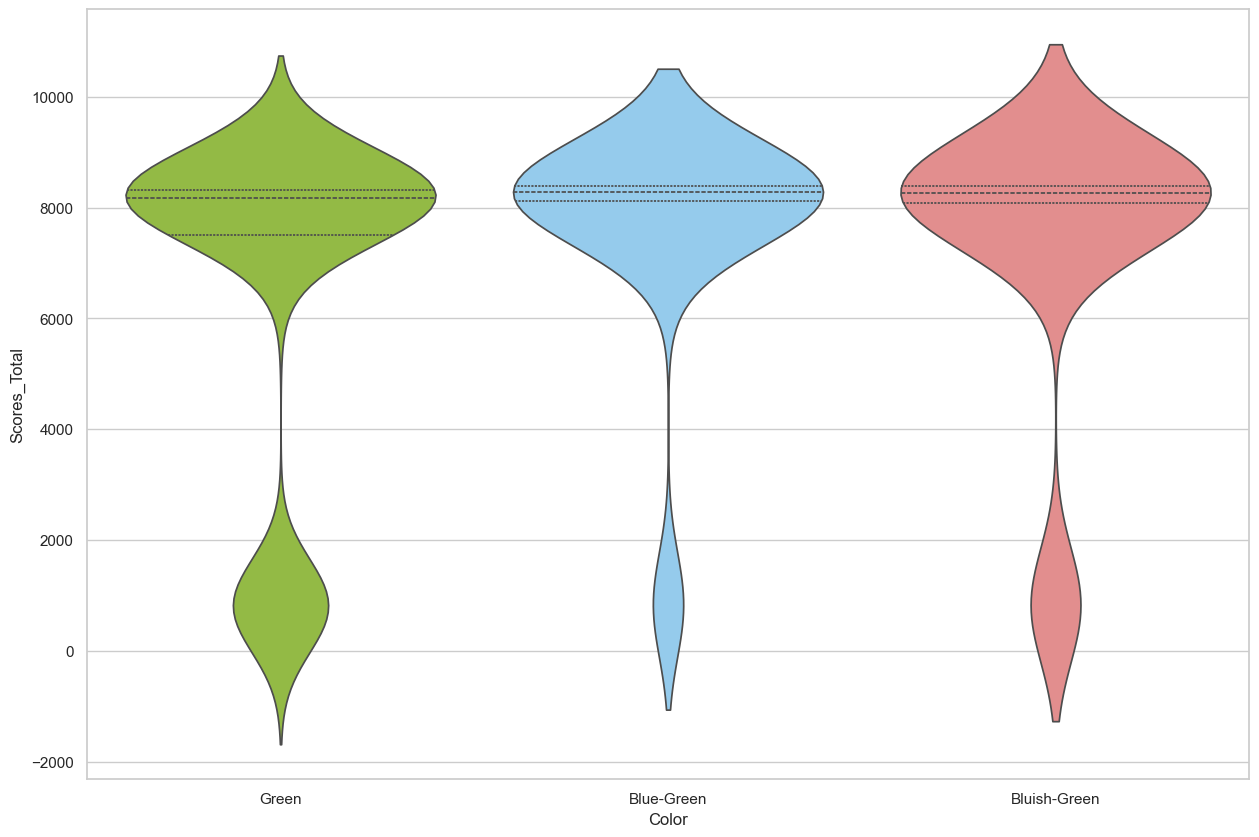

In [76]:
for column in df.drop("Color", axis=1).columns:
    violinplots(df, "Color", column)

Los violines diferenciados para cada clase muestran comportamientos similares en las variables, lo cual nos indica que no hay una gran diferencia entre las clases en cuanto a la distribución de los datos. Sin embargo debemos tener en cuenta el profundo desequilibrio del dataset en cálculos futuros.

In [97]:
def plot_variables(df):
    sns.set(style="darkgrid")

    # Obtiene una lista de todas las columnas numéricas del DataFrame
    numeric_columns = df.drop('Color',axis=1).select_dtypes(include=['number']).columns

    # Calcula el número de filas y columnas necesarias para el ploteo
    num_rows = (len(numeric_columns) + 1) // 2
    num_cols = 2

    fig, axs = plt.subplots(
        num_rows, num_cols, 
        figsize=(3 * num_rows, 15 * num_cols),  # Ajusta el tamaño del subplot
        gridspec_kw={'height_ratios': [15] * num_rows}  # Ajusta la altura de cada subplot
    )

    # Espacio entre los subplots
    plt.subplots_adjust(wspace=1, hspace=1)

    # Colores distintos para los histogramas
    colors = sns.color_palette("Set2", n_colors=len(numeric_columns))

    # Itera a través de las columnas numéricas y crea un histograma para cada una
    for i, col in enumerate(numeric_columns):
        row = i // num_cols
        col_idx = i % num_cols

        # Selecciona un color diferente para cada histograma
        color = colors[i]

        sns.histplot(data=df, x=col, kde=True, color=color, ax=axs[row, col_idx])

        axs[row, col_idx].set_xlabel(col, fontsize=30)
        axs[row, col_idx].set_ylabel("Count",fontsize=20)

        # Cambia el tamaño de letra de los ejes X y Y
        axs[row, col_idx].tick_params(axis='x', labelsize=20)
        axs[row, col_idx].tick_params(axis='y', labelsize=20)

    # Elimina cualquier subplot no utilizado
    for i in range(len(numeric_columns), num_rows * num_cols):
        row = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axs[row, col_idx])

    # Añade un título general a la figura
    fig.suptitle(f"Histogramas de variales numéricas", fontsize=30)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
    plt.show()

def matriz_correlacion(df):
    corr = df.select_dtypes(include=[float, int]).corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(20, 15))

    ax = sns.heatmap(
        corr,
        #mask = mask,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        annot_kws={'size': 15},
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    # Añade un título general a la figura
    ax.set_title("Matriz de Correlación", fontsize=30)
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
    plt.show()


def scatter_plot(df):
    numeric_cols = df.drop('Color',axis=1).select_dtypes(include=['number'])
    num_plots = len(numeric_cols.columns)
    
    # Determina el número de filas y columnas para la matriz
    num_rows = (num_plots + 2) // 3  # Redondea hacia arriba
    num_cols = min(num_plots, 3)

    # Aumenta el tamaño de la figura
    figsize = (20, num_rows * 6)  # Aumenta la altura de la figura
    
    # Crea una figura de Matplotlib con subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, col in enumerate(numeric_cols.columns):
        row = i // num_cols
        col_num = i % num_cols  # Cambia el nombre de la variable para evitar la confusión

        # Selecciona el subplot actual
        ax = axes[row, col_num]

        # Crea el gráfico de dispersión en el subplot
        sns.scatterplot(x=col, y='Color', data=df, ax=ax)
        ax.set_title(col)  # Configura el título del subplot

    # Elimina subplots no utilizados
    for i in range(num_plots, num_rows * num_cols):
        row = i // num_cols
        col_num = i % num_cols
        fig.delaxes(axes[row, col_num])

    plt.tight_layout()
    plt.show()
    
def graficos(df):
    # Imprimir la cantidad de datos disponibles
    print(f"Cantidad de datos disponibles en el DataFrame: {len(df)}")
    plot_variables(df)
    matriz_correlacion(df)
    scatter_plot(df)

Cantidad de datos disponibles en el DataFrame: 835


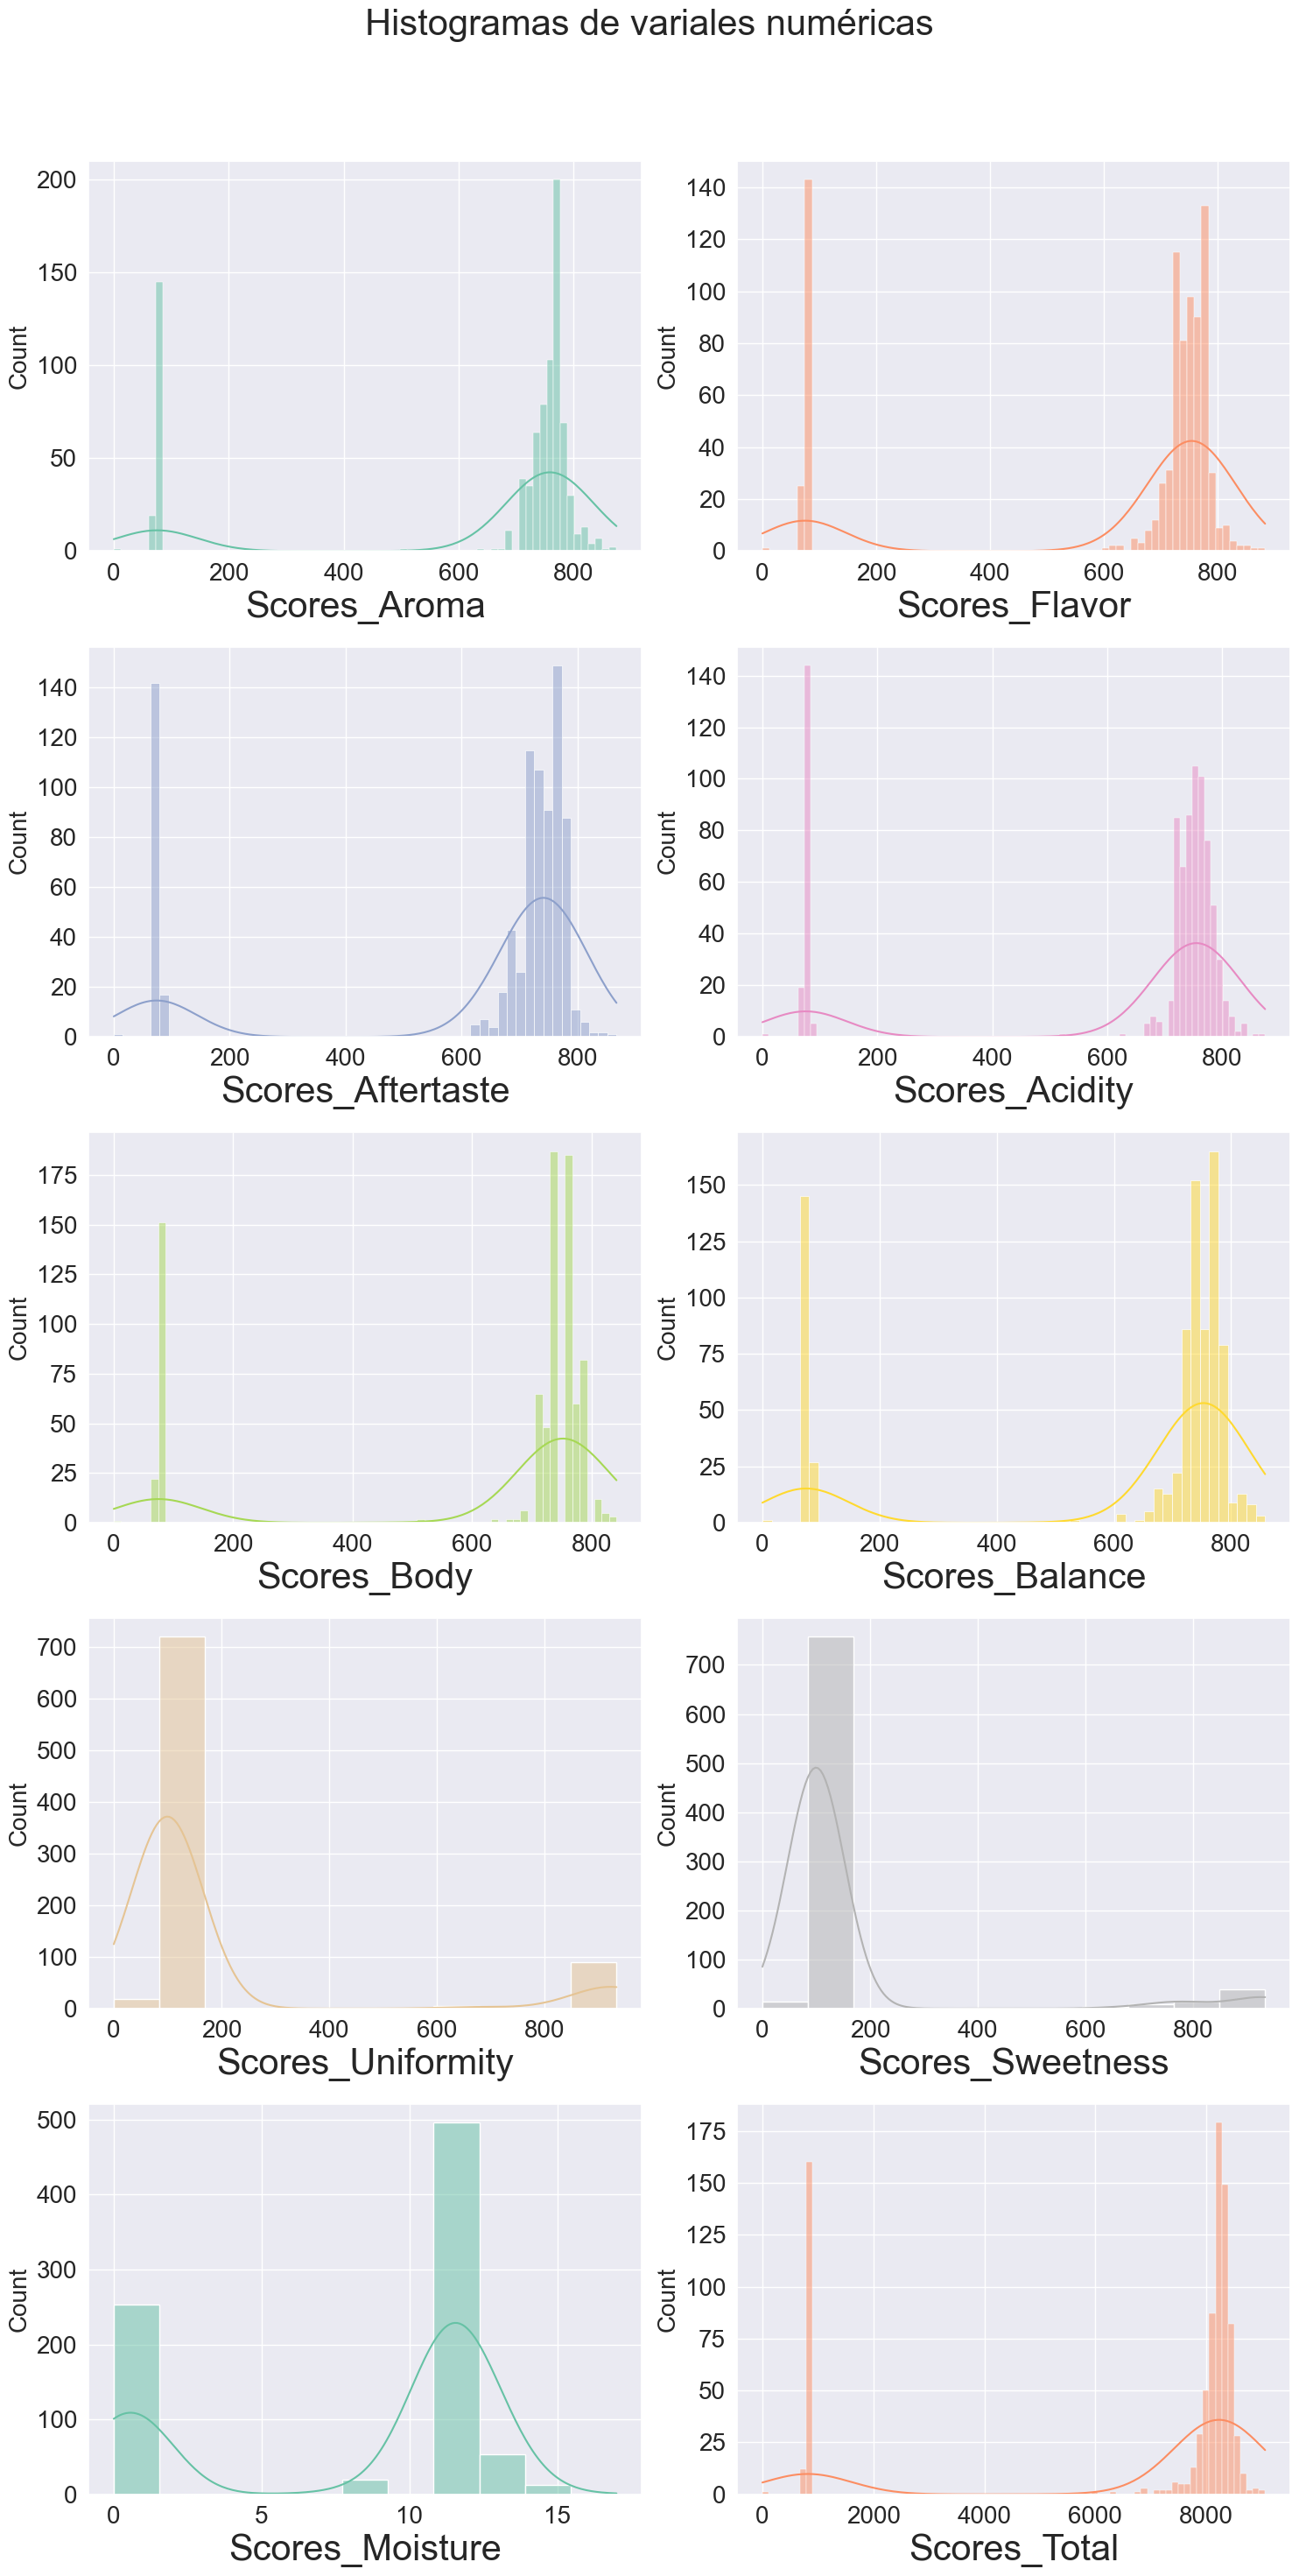

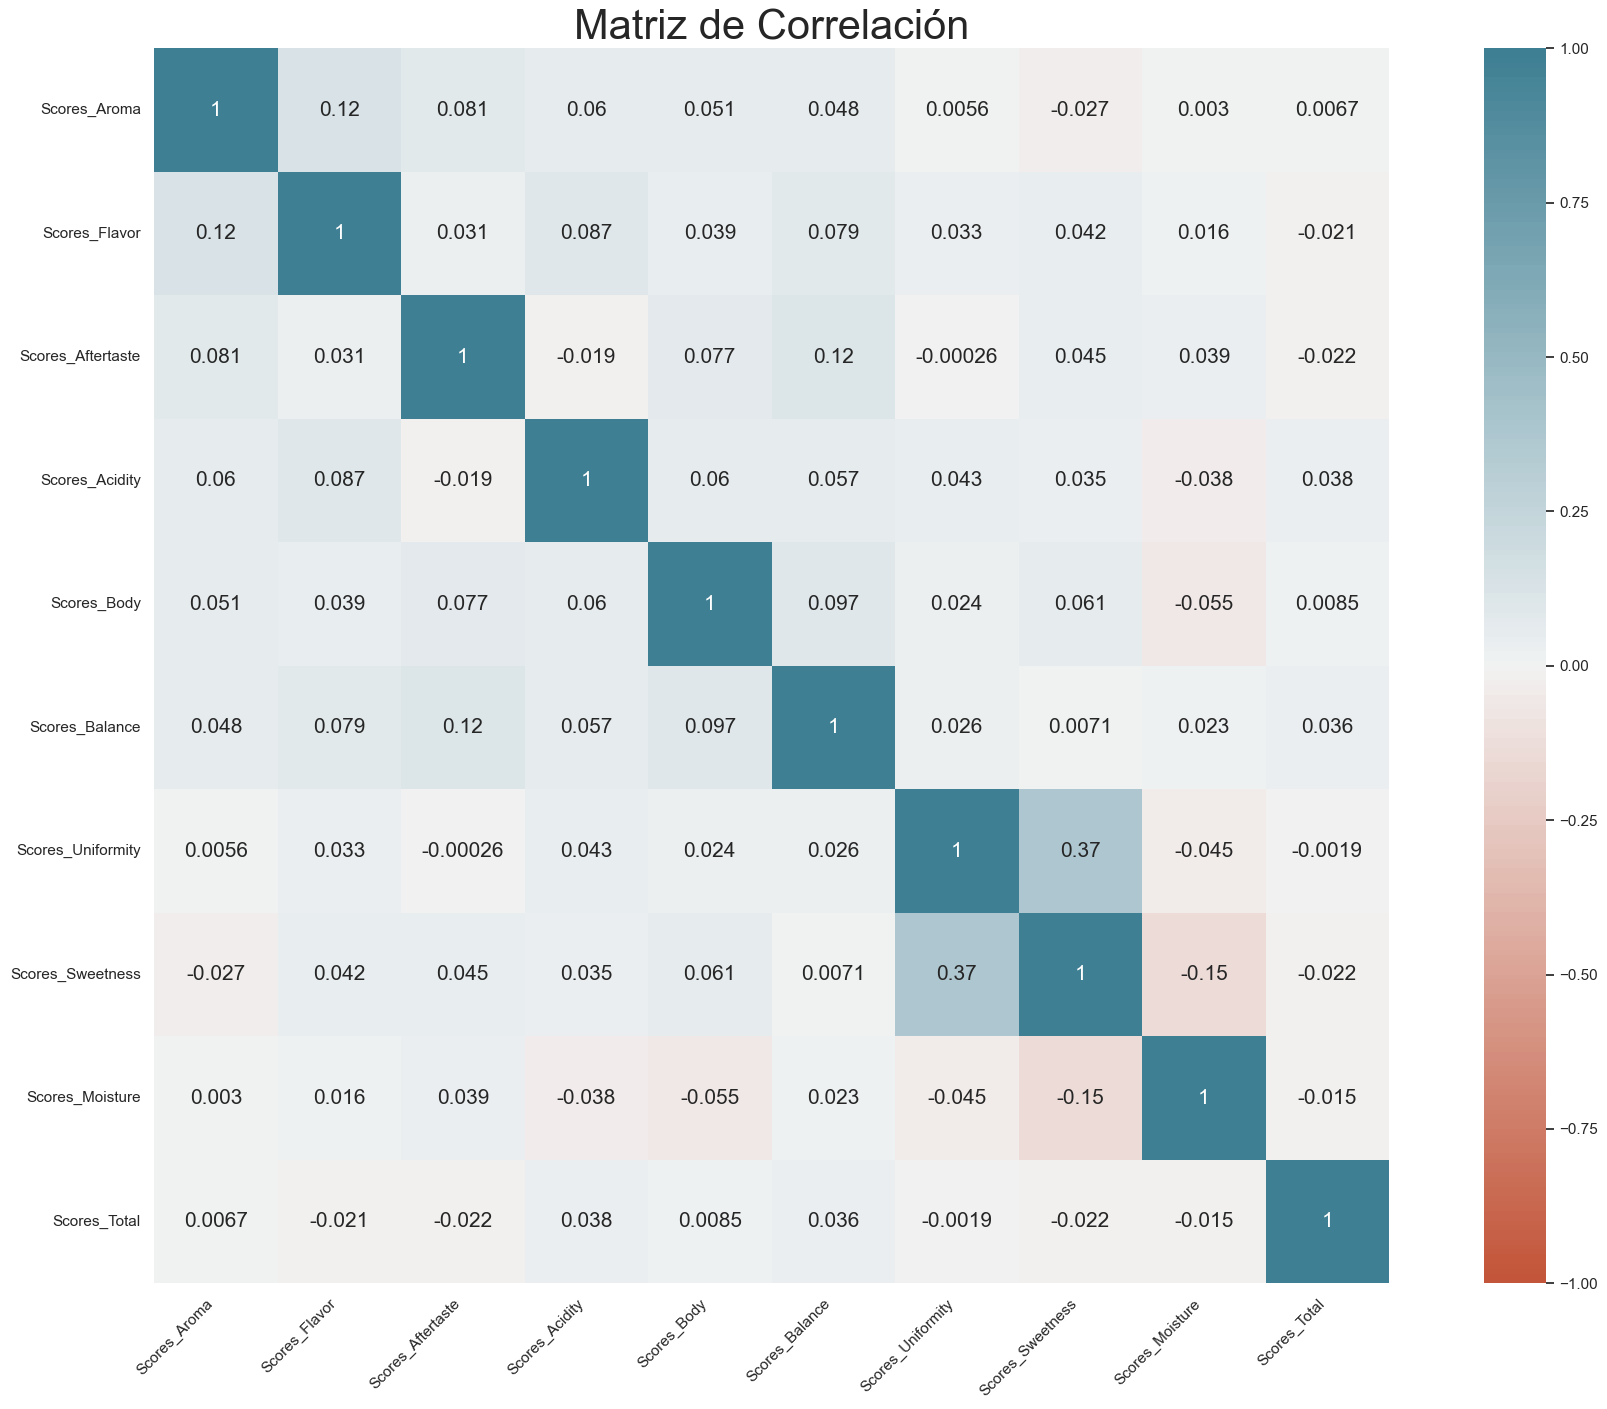

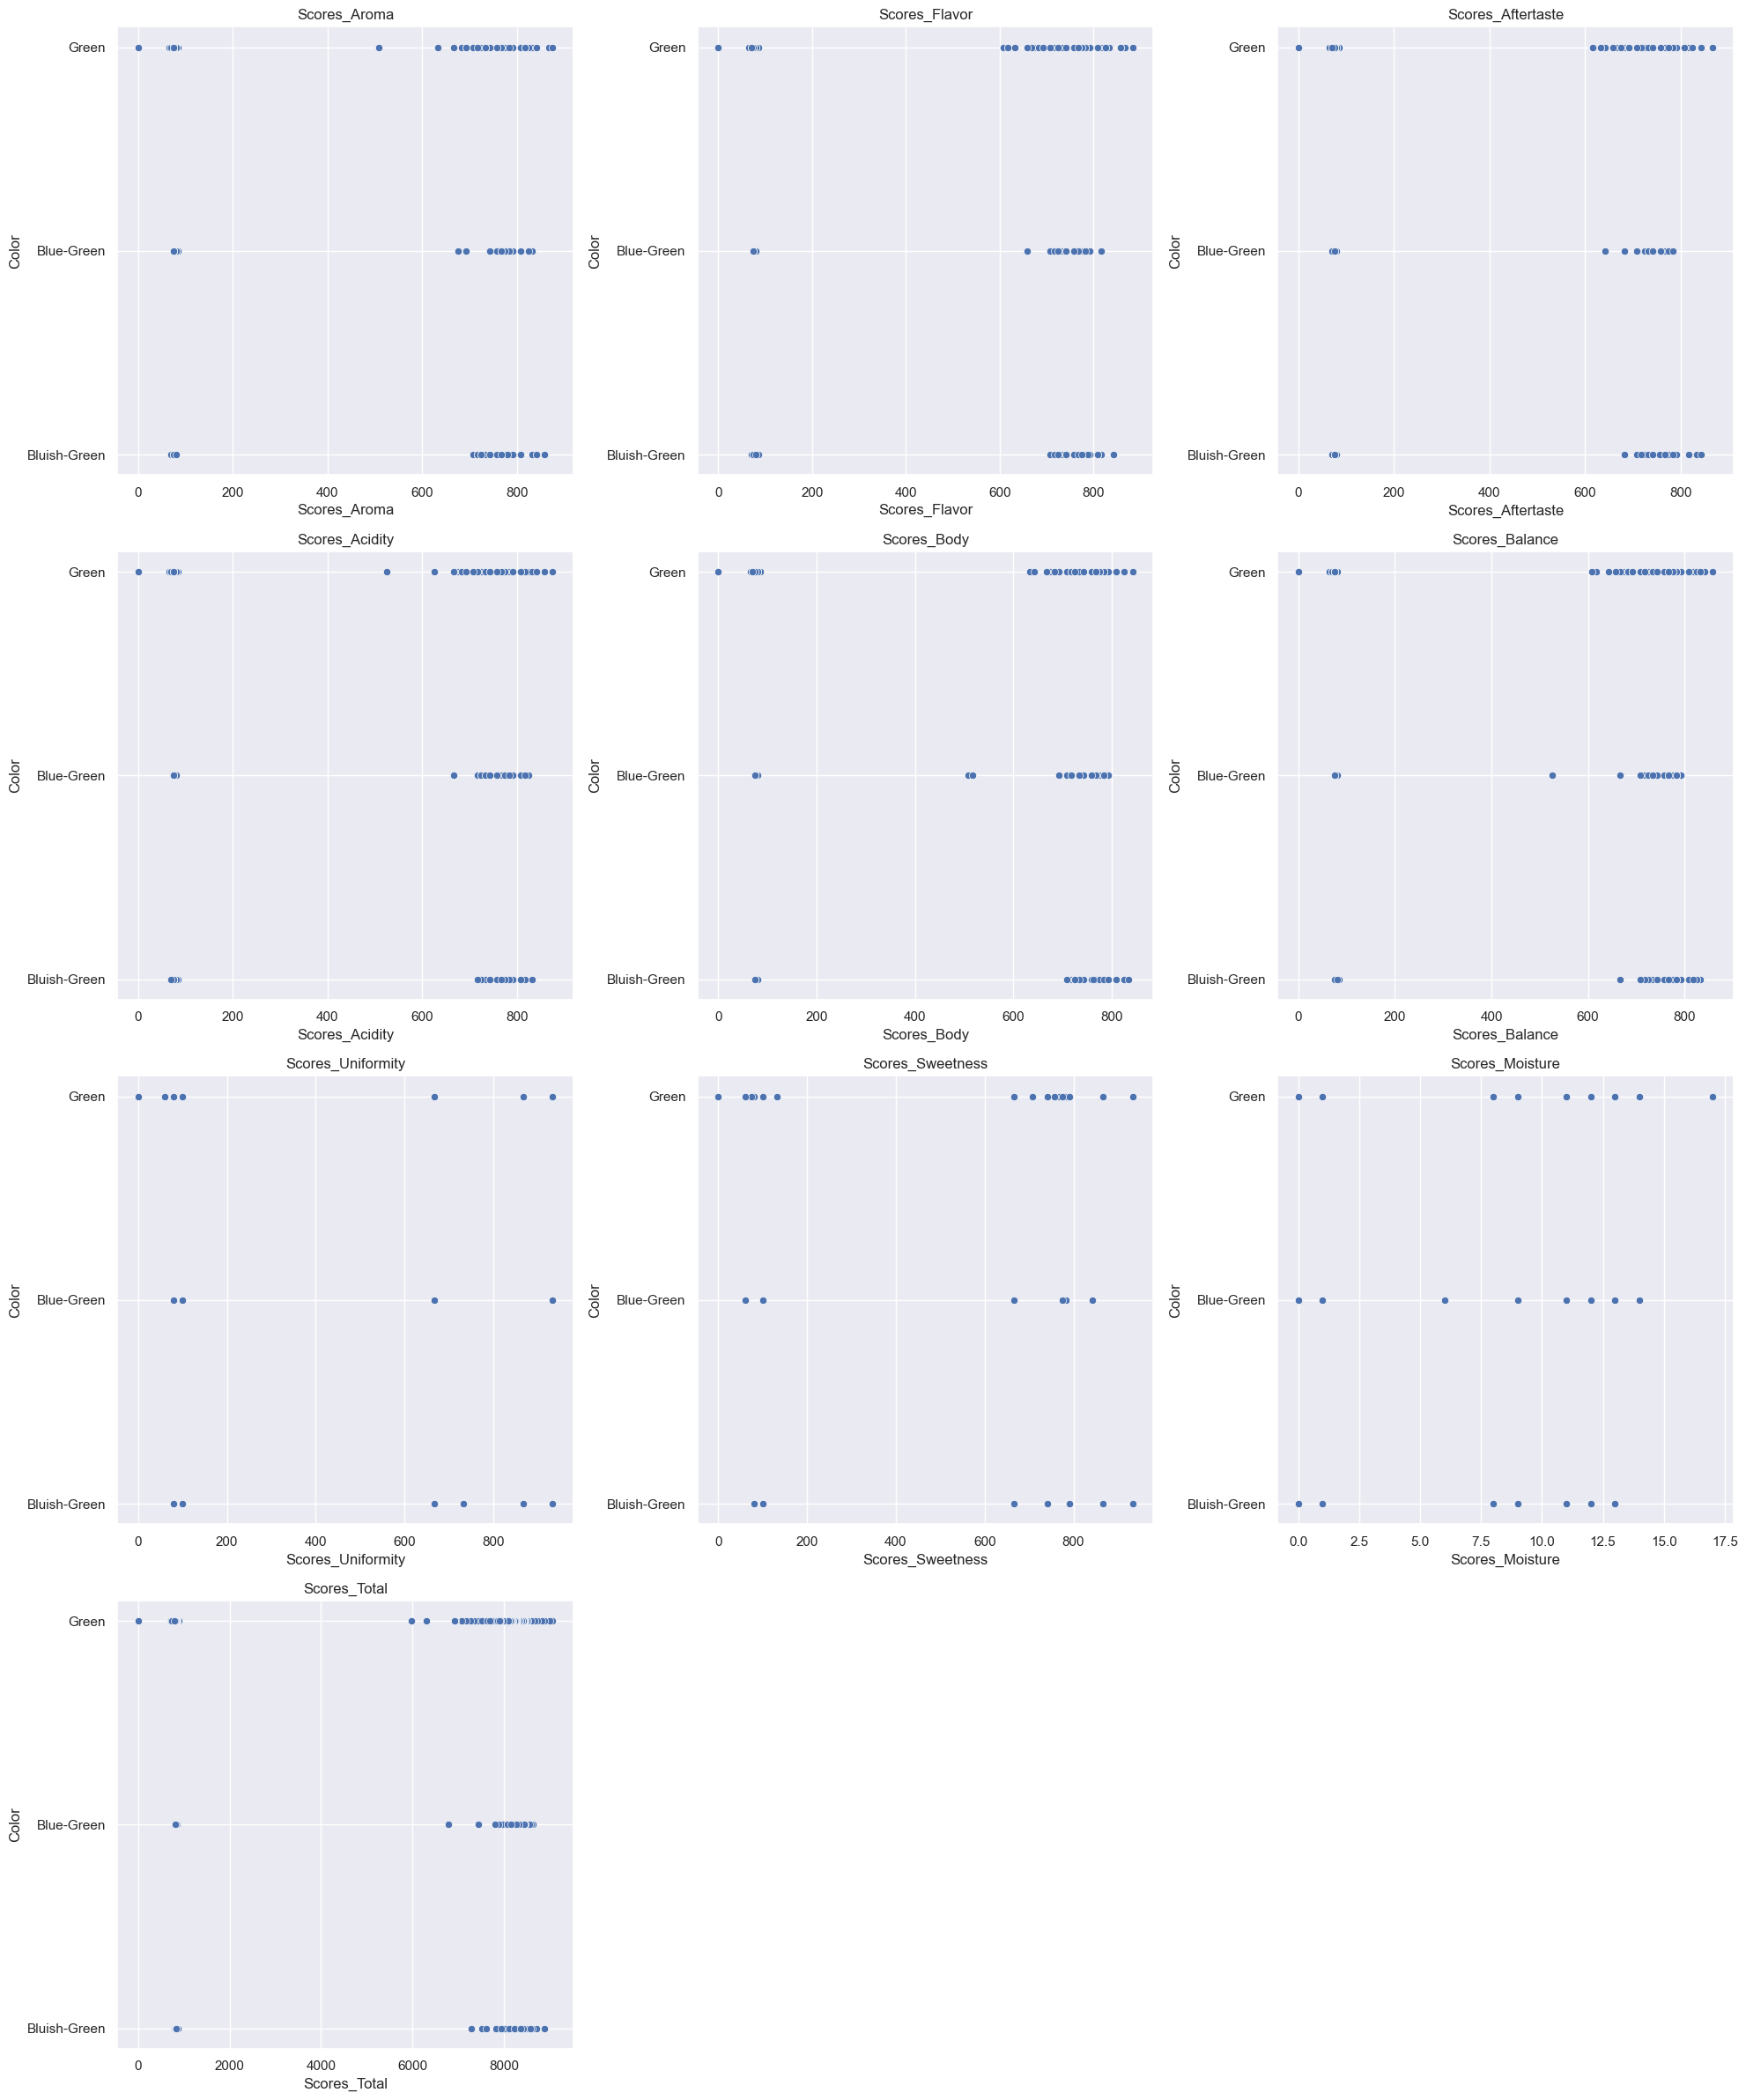

In [98]:
graficos(df)

Los histogramas y los scatter plot nos permiten visualizar nuevamente la distribución gaussiana bimodal de los datos. En el caso de la matriz de correlación podemos notar que ningún par de variables presenta una correlación significativa, lo cual nos indica que no hay una relación lineal entre las variables.

## Balanceo dataset

Dado el desbalanceo íntrinseco del dataset, procedemos a realizar un oversampling de las clases minoritarias para que tengan la misma cantidad de datos que las clases mayoritarias. Esto nos permitirá tener mejores desempeños en los modelos a entrenar y que los mismos no esten sesgados hacia las clases mayoritarias.

Original dataset shape Counter({'Green': 681, 'Bluish-Green': 96, 'Blue-Green': 58})
Resampled dataset shape Counter({'Green': 681, 'Blue-Green': 681, 'Bluish-Green': 681})


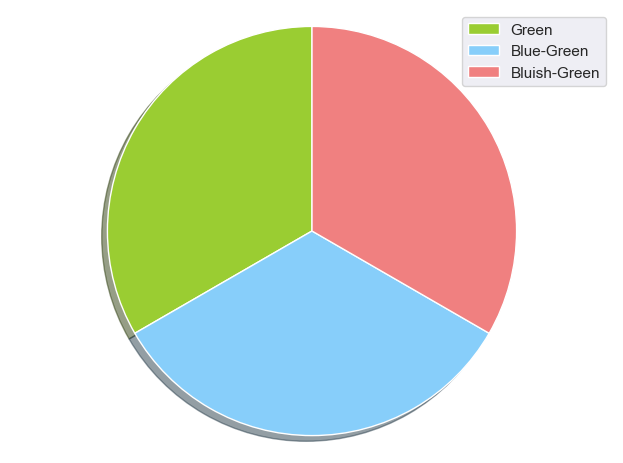

In [79]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df.drop(['Color'], axis=1)
y = df['Color']

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

# Ploteo distribución de "Output"
temp = y_res.value_counts()
df_aux = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df_aux['labels']
sizes = df_aux['values']
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


## Split

In [80]:
# Separar X e y
# X_Bi = df.drop('Color', axis=1)
# y_Bi = df['Color']

X_Bi = X_res
y_Bi = y_res

# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(y_Bi.ravel())
# Y_train_encoded = label_encoder.transform(y_Bi.ravel())
# Y_train_encoded = label_encoder.transform(y_Bi.ravel())


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_Bi)

X_train, X_test, Y_train, Y_test = train_test_split(X_Bi,
                                                                Y_train_encoded.reshape(-1,1),
                                                                train_size = 0.8,
                                                                random_state = 42,
                                                                shuffle = True)

In [81]:
Y_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [82]:
Y_train_encoded

array([2, 2, 0, ..., 1, 1, 1])

In [83]:
X_train

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
1850,769,546,742,749,764,75,100,100,11,8286
1596,75,75,745,400,732,737,100,100,11,8194
1562,80,80,784,827,783,635,100,100,2,8583
1611,767,758,757,767,774,775,100,100,11,8375
1693,725,742,724,732,737,737,100,100,9,8143
...,...,...,...,...,...,...,...,...,...,...
1130,79,88,88,816,782,79,100,100,0,8587
1294,761,612,737,612,761,75,100,100,12,8242
860,775,767,770,775,774,783,100,100,0,8450
1459,176,767,758,770,761,744,100,100,11,830


## SVM - KERNEL LINEAL

In [ ]:
#I want to do a code for a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [84]:
# Definición del Modelo
svm_classifier_linear = SVC(kernel='linear', C=1.0)

# Entrenamiento
svm_classifier_linear.fit(X_train, Y_train)

# Predicciones
y_pred_linear = svm_classifier_linear.predict(X_test)

# Evaluación
accuracy = accuracy_score(Y_test, y_pred_linear)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 46.45%


## SVM - KERNEL GAUSSIANO

In [85]:
# Parámetros del Gridsearch
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                'C': [1, 10, 100, 1000]},
                 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [86]:
# Aplicar GS para elegir los mejores hiperparámetros
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [87]:
# Mejor modelo
C= svm_model.best_estimator_.C
kernel= svm_model.best_estimator_.kernel
gamma= svm_model.best_estimator_.gamma

print('C:',svm_model.best_estimator_.C,"\n")
print('Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Gamma:',svm_model.best_estimator_.gamma,"\n")
print('Métricas:', svm_model.best_score_,"\n")

C: 100 

Kernel: rbf 

Gamma: 0.0001 

Métricas: 0.7564548507532691 



In [88]:
# Crear un clasificador SVM con kernel gaussiano
svm_classifier_rbf = SVC(kernel=kernel, C=C, gamma=gamma)  # Puedes ajustar los parámetros C y gamma según sea necesario

# Entrenar el clasificador SVM
svm_classifier_rbf.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rbf = svm_classifier_rbf.predict(X_test)

# Evaluar el modelo
accuracy_rbf = accuracy_score(Y_test, y_pred_rbf)
print(f"Accuracy (Kernel Gaussiano): {accuracy_rbf * 100:.2f}%")

Accuracy (Kernel Gaussiano): 77.51%


## RANDOM FOREST

In [89]:
#Definición del modelo
rfc = RandomForestClassifier()

#Entrenamiento
rfc.fit(X_train, Y_train)

#Predicciones
y_pred_rfc = rfc.predict(X_test)

#Evaluación
print(confusion_matrix(Y_test, y_pred_rfc))

print(classification_report(Y_test, y_pred_rfc))

print(accuracy_score(Y_test, y_pred_rfc))

#Parámetros del Gridsearch

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [3,4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#Aplicar GS para elegir los mejores hiperparámetros
rfc_model = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5)
rfc_model.fit(X_train, Y_train)

#Mejor modelo
bootstrap = rfc_model.best_estimator_.bootstrap
max_depth = rfc_model.best_estimator_.max_depth
max_features = rfc_model.best_estimator_.max_features
min_samples_leaf = rfc_model.best_estimator_.min_samples_leaf
min_samples_split = rfc_model.best_estimator_.min_samples_split
n_estimators = rfc_model.best_estimator_.n_estimators

print('Bootstrap:',rfc_model.best_estimator_.bootstrap,"\n")
print('Max Depth:',rfc_model.best_estimator_.max_depth,"\n")
print('Max Features:',rfc_model.best_estimator_.max_features,"\n")
print('Min Samples Leaf:',rfc_model.best_estimator_.min_samples_leaf,"\n")
print('Min Samples Split:',rfc_model.best_estimator_.min_samples_split,"\n")
print('N Estimators:',rfc_model.best_estimator_.n_estimators,"\n")
print('Métricas:', rfc_model.best_score_,"\n")

#Crear un clasificador Random Forest
rfc_classifier = RandomForestClassifier(bootstrap=bootstrap, max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_estimators=n_estimators)

#Entrenar el clasificador Random Forest
rfc_classifier.fit(X_train, Y_train)

#Realizar predicciones en el conjunto de prueba
y_pred_rfc = rfc_classifier.predict(X_test)

#Evaluar el modelo
accuracy_rfc = accuracy_score(Y_test, y_pred_rfc)
print(f"Accuracy (Random Forest): {accuracy_rfc * 100:.2f}%")

[[122   3   5]
 [  6 121  14]
 [  7  19 112]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       130
           1       0.85      0.86      0.85       141
           2       0.85      0.81      0.83       138

    accuracy                           0.87       409
   macro avg       0.87      0.87      0.87       409
weighted avg       0.87      0.87      0.87       409

0.8679706601466992
Bootstrap: True 

Max Depth: 100 

Max Features: 3 

Min Samples Leaf: 3 

Min Samples Split: 8 

N Estimators: 200 

Métricas: 0.8347704545880941 

Accuracy (Random Forest): 85.82%


## Análisis de indicadores

In [101]:
#Analizaremos precisión, exactitud y Exhaustividad de los tres modelos

#Precisión
print("Precisión")
print("SVM Lineal:", accuracy)
print("SVM RBF:", accuracy_rbf)
print("Random Forest:", accuracy_rfc)

#Exactitud
print("\nExactitud")
print("SVM Lineal:", accuracy_score(Y_test, y_pred_linear, normalize=False))
print("SVM RBF:", accuracy_score(Y_test, y_pred_rbf, normalize=False))
print("Random Forest:", accuracy_score(Y_test, y_pred_rfc, normalize=False))

#Exhaustividad
print("\nExhaustividad")
print("SVM Lineal:\n", classification_report(Y_test, y_pred_linear))
print("SVM RBF:\n", classification_report(Y_test, y_pred_rbf))
print("Random Forest:\n", classification_report(Y_test, y_pred_rfc))

Precisión
SVM Lineal: 0.46454767726161367
SVM RBF: 0.7750611246943765
Random Forest: 0.8581907090464548

Exactitud
SVM Lineal: 190
SVM RBF: 317
Random Forest: 351

Exhaustividad
SVM Lineal:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53       130
           1       0.42      0.64      0.51       141
           2       0.46      0.24      0.32       138

    accuracy                           0.46       409
   macro avg       0.48      0.46      0.45       409
weighted avg       0.47      0.46      0.45       409

SVM RBF:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       130
           1       0.80      0.72      0.76       141
           2       0.68      0.77      0.72       138

    accuracy                           0.78       409
   macro avg       0.78      0.78      0.78       409
weighted avg       0.78      0.78      0.78       409

Random Forest:
               precisi

Es fácil notar que random forest presenta los mejores desempeños en todos los indicadores. Por otro lado, el desempeño de SVM con kernel gaussiano es muy similar al de random forest, por lo que podríamos considerar que es un buen modelo para este dataset. El bajo desempeño de SVM con kernel lineal se explica con la propia naturaleza de los datos que no presentan relaciones lineales entre sí.

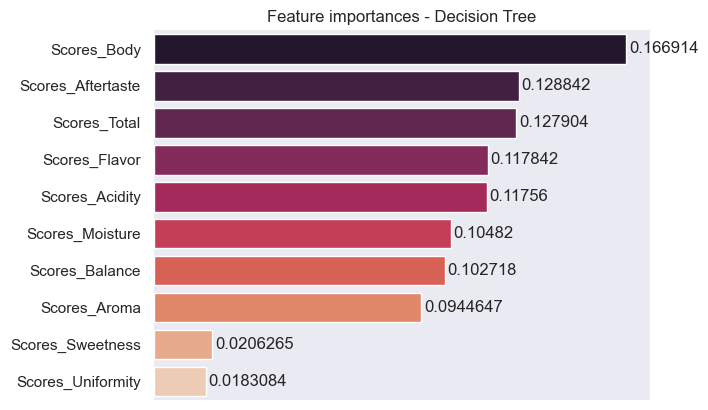

In [90]:
feature_list = list(df.drop('Color', axis=1).columns)	 

# Convertimos los df de variables (x) a array
train_features = np.array(X_train)
test_features = np.array(X_test)

# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': feature_list, 'importances': rfc_classifier.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

Notamos que las variables "Body", "Aftertaste" y "Total" son las que más aportan a la clasificación de las clases, por lo que podríamos considerar que son las más importantes. En el caso opuesto las variables "Sweetness" y "Uniformity" son las que menos aportan a la clasificación de las clases, por lo que podríamos considerar que son las menos importantes.

Text(0.5, 1.0, 'Accuracy Score: 0.8581907090464548')

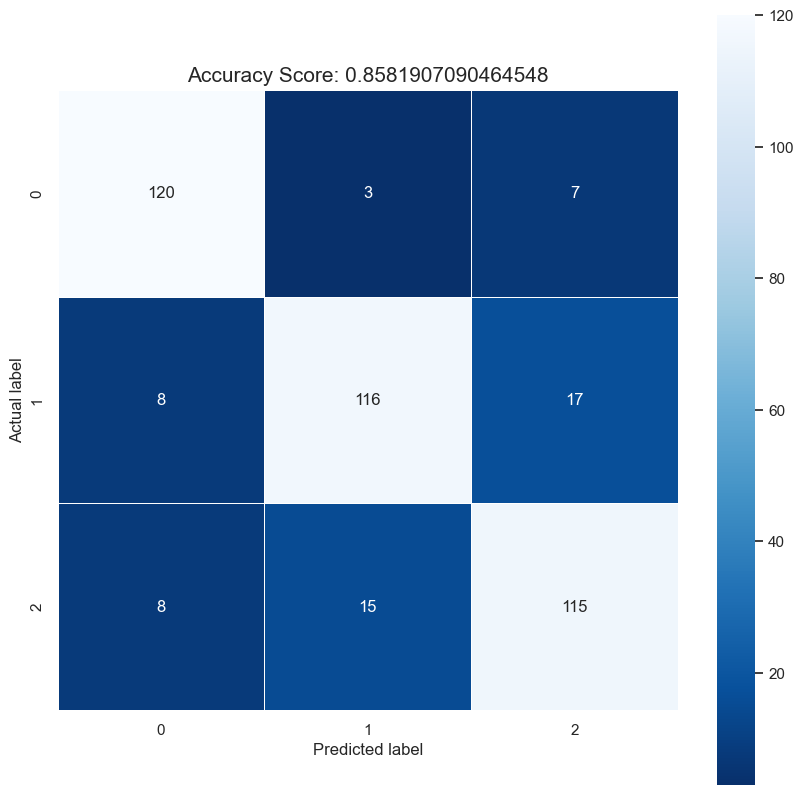

In [91]:
cm = confusion_matrix(Y_test, y_pred_rfc)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_rfc)
plt.title(all_sample_title, size=15)

Vemos que el modelo RandomForest presenta un desempeño muy bueno para la matriz de correlación, sin embargo debemos tener en cuenta que el dataset usado esta modificado. Procederemos a realizar el mismo análisis con el dataset original para ver si los resultados se mantienen.

Text(0.5, 1.0, 'Accuracy Score: 0.8581907090464548')

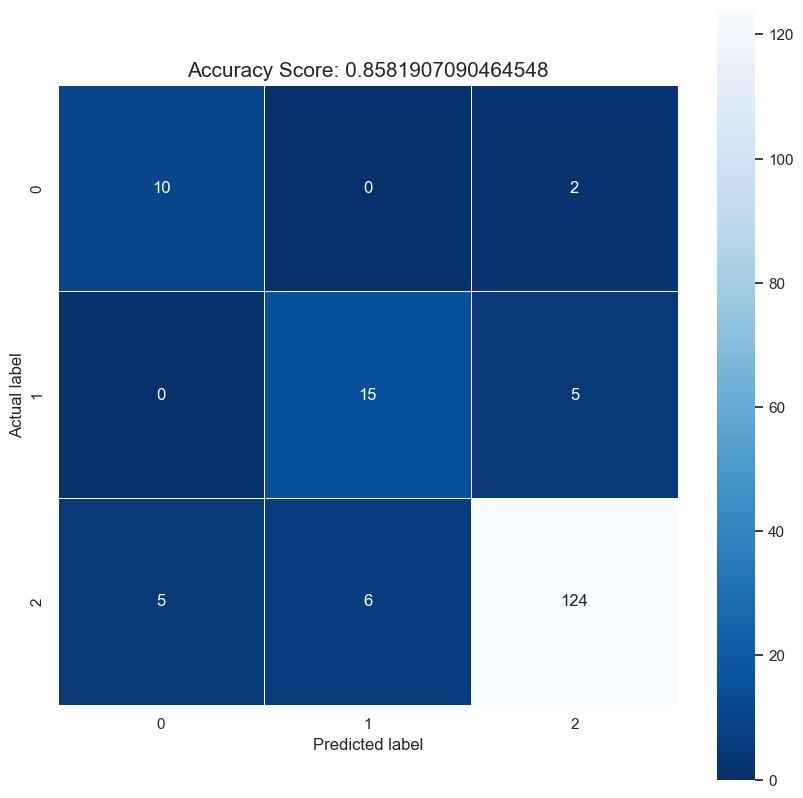

In [103]:
X_normal = df.drop(['Color'], axis=1)
y_normal = df['Color']

X_Bi_normal = X_normal
y_Bi_normal = y_normal

# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
Y_train_encoded_normal = label_encoder.fit_transform(y_Bi_normal.ravel())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_Bi_normal)

X_train_normal, X_test_normal, Y_train_normal, Y_test_normal = train_test_split(X_Bi_normal,
                                                                                Y_train_encoded_normal.reshape(-1,1),
                                                                                train_size = 0.8,
                                                                                random_state = 42,
                                                                                shuffle = True)

y_pred_rfc_normal = rfc_classifier.predict(X_test_normal)

cm = confusion_matrix(Y_test_normal, y_pred_rfc_normal)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_rfc)
plt.title(all_sample_title, size=15)

Notamos que el modelo aún presenta cierto sesgo hacia la clase mayoritaria, sin embargo mantiene un desempeño mas que aceptable para las clases minoritarias, podemos concluir entonces que la elección de hacer un oversampling de las clases minoritarias fue correcta y el modelo es bueno para este problema.